In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64
learning_rate = 0.001
epochs = 15

train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_dataset = datasets.MNIST(root='./data', train=True,
                              download=True, transform=train_transform)

val_dataset = datasets.MNIST(root='./data', train=False,
                              download=True, transform=val_transform)

train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.16MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.01MB/s]


In [ ]:
class Neuro_itmo(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()

    self.linear1 = nn.Linear(28*28, 2056)
    self.linear2 = nn.Linear(2056, 1024)
    self.linear3 = nn.Linear(1024, 512)
    self.linear4 = nn.Linear(512, 256)
    self.linear5 = nn.Linear(256, 128)
    self.linear6 = nn.Linear(128, 64)
    self.linear7 = nn.Linear(64, 32)
    self.linear8 = nn.Linear(32, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = torch.relu(self.linear3(x))
    x = torch.relu(self.linear4(x))
    x = torch.relu(self.linear5(x))
    x = torch.relu(self.linear6(x))
    x = torch.relu(self.linear7(x))
    x = self.linear8(x)
    return x

In [12]:
model = Neuro_itmo()
critery = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
  model.train()
  epoch_train_loss = 0.0

  for img, label in train_loader:
    img, label = img.to(device), label.to(device)

    outs = model(img)
    loss = critery(outs, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_train_loss += loss.item()

  train_losses.append(epoch_train_loss / len(train_loader))

  model.eval()
  val_loss = 0.0
  correct_val = 0
  total_val = 0

  with torch.no_grad():
    for img, label in val_loader:
      img, label = img.to(device), label.to(device)
      outs = model(img)
      loss_val = critery(outs, label)
      val_loss += loss_val.item()

      _, predicted_val = torch.max(outs.data, 1)
      total_val += label.size(0)
      correct_val += (predicted_val == label).sum().item()

  val_losses.append(val_loss / len(val_loader))
  accuracy_val = correct_val / total_val * 100
  val_accuracies.append(accuracy_val)

  print(f'Эпоха [{epoch+1}/{epochs}], потери на тренировочном наборе: {train_losses[-1]:.4f}, потери на валидационном наборе: {val_losses[-1]:.4f}, точность на валидационном наборе: {accuracy_val:.2f}%')

Эпоха [1/15], потери на тренировочном наборе: 0.6919, потери на валидационном наборе: 0.2671, точность на валидационном наборе: 92.16%
Эпоха [2/15], потери на тренировочном наборе: 0.2737, потери на валидационном наборе: 0.1928, точность на валидационном наборе: 94.26%
Эпоха [3/15], потери на тренировочном наборе: 0.2135, потери на валидационном наборе: 0.1432, точность на валидационном наборе: 95.59%
Эпоха [4/15], потери на тренировочном наборе: 0.1834, потери на валидационном наборе: 0.1448, точность на валидационном наборе: 95.65%
Эпоха [5/15], потери на тренировочном наборе: 0.1615, потери на валидационном наборе: 0.1026, точность на валидационном наборе: 97.04%
Эпоха [6/15], потери на тренировочном наборе: 0.1447, потери на валидационном наборе: 0.1034, точность на валидационном наборе: 97.00%
Эпоха [7/15], потери на тренировочном наборе: 0.1349, потери на валидационном наборе: 0.1024, точность на валидационном наборе: 97.11%
Эпоха [8/15], потери на тренировочном наборе: 0.1244, п

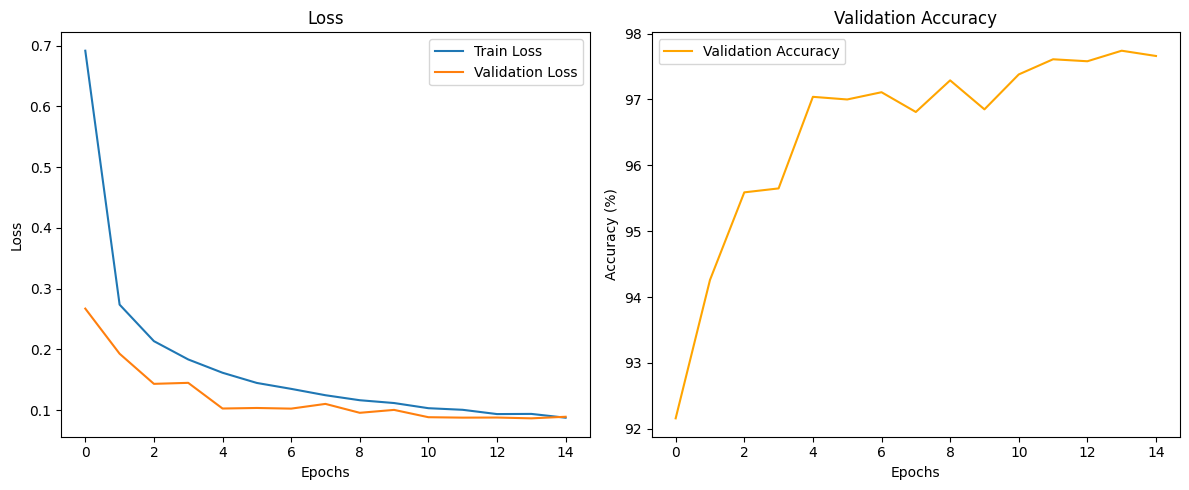

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()


plt.tight_layout()
plt.show()


In [15]:
test_dataset = datasets.MNIST(root='./data', train=False,
                              download=True, transform=val_transform)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size, shuffle=False)


model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted_test = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

accuracy_test = correct_test / total_test * 100
print(f'Точность полученной модели на тестовом наборе данных: {accuracy_test:.2f}%')

Точность полученной модели на тестовом наборе данных: 97.66%
